## Task B: Category Detection



In [59]:
%load_ext autoreload
%autoreload 2

from hatedetection import load_datasets
import glob
import json

train_dataset, dev_dataset, test_dataset = load_datasets(add_body=True)

no_context_evals = []
context_evals = []
full_context_evals = []

for path in glob.glob("../evaluations/non-context-category*"):
    with open(path) as f:
        obj = json.load(f)
        obj["file"] = path
        no_context_evals.append(obj)

for path in glob.glob("../evaluations/context-category*"):
    with open(path) as f:
        obj = json.load(f)
        obj["file"] = path
        context_evals.append(obj)


for path in glob.glob("../evaluations/title-body-category*"):
    with open(path) as f:
        obj = json.load(f)
        obj["file"] = path
        full_context_evals.append(obj)

print(f"We have {len(full_context_evals)} full context evaluations")
print(f"We have {len(context_evals)} context evaluations")
print(f"We have {len(no_context_evals)} no context evaluations")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
We have 15 full context evaluations
We have 16 context evaluations
We have 16 no context evaluations


In [60]:
import pandas as pd

metric_columns = [
    'eval_calls_f1', 'eval_women_f1', 'eval_lgbti_f1', 'eval_racism_f1',
    'eval_class_f1', 'eval_politics_f1', 'eval_disabled_f1',
    'eval_appearance_f1', 'eval_criminal_f1', 'eval_mean_f1',
    'eval_mean_precision', 'eval_mean_recall'    
]



df_full_context_evals = pd.DataFrame([
    {**{"file": evaluation["file"]}, **evaluation["metrics"]} for evaluation in full_context_evals
])

df_context_evals = pd.DataFrame([
    {**{"file": evaluation["file"]}, **evaluation["metrics"]} for evaluation in context_evals
])

df_no_context_evals = pd.DataFrame([
    {**{"file": evaluation["file"]}, **evaluation["metrics"]} for evaluation in no_context_evals
])

full_context_df = pd.DataFrame({
    "full context mean": df_full_context_evals[metric_columns].mean(), 
    "full context std": df_full_context_evals[metric_columns].std()})

context_df = pd.DataFrame({
    "context mean": df_context_evals[metric_columns].mean(), 
    "context std": df_context_evals[metric_columns].std()
})

no_context_df = pd.DataFrame({
    "no context mean": df_no_context_evals[metric_columns].mean(), 
    "no context std": df_no_context_evals[metric_columns].std()})


result_df = pd.concat([full_context_df, context_df, no_context_df], axis=1)

result_df

,full context mean,full context std,context mean,context std,no context mean,no context std
eval_calls_f1,0.804625,0.016978,0.801637,0.009916,0.784165,0.008949
eval_women_f1,0.707943,0.016711,0.672225,0.014997,0.652158,0.010933
eval_lgbti_f1,0.857255,0.011824,0.842527,0.020611,0.590471,0.017874
eval_racism_f1,0.939455,0.007488,0.942906,0.004489,0.862699,0.004899
eval_class_f1,0.741876,0.014109,0.726768,0.012011,0.593249,0.011060
eval_politics_f1,0.771214,0.011506,0.752979,0.007360,0.717805,0.014555
eval_disabled_f1,0.791217,0.015026,0.750196,0.028966,0.786369,0.015904
eval_appearance_f1,0.891983,0.009970,0.878756,0.009601,0.844621,0.004387
eval_criminal_f1,0.907254,0.007939,0.901019,0.007573,0.744453,0.008515
eval_mean_f1,0.823647,0.005682,0.807668,0.006250,0.730666,0.003954


In [93]:
def print_mean(row, context, ):
    mean = row[context + " mean"]
    std = row[context + " std"]
    return f"${mean:.3f} \pm {std:.3f}$"

display_df = pd.DataFrame()

for context, model_name in [
    ("no context", "BERT No Context"),
    ("context", "BERT Title"), 
    ("full context", "BERT Title+Body"), 
    ]:
    display_df[model_name] = result_df.apply(lambda x: print_mean(x, context), axis=1)


display_df["metrics"] = display_df.index.map(lambda x: " ".join([y.capitalize() for y in x.split("_")[1:]]))
display_df.reset_index(inplace=True)
del display_df["index"]
display_df.set_index("metrics", inplace=True)

display_df = display_df.T[["Mean F1"]]

display_df

metrics,Mean F1
BERT No Context,$0.731 \pm 0.004$
BERT Title,$0.808 \pm 0.006$
BERT Title+Body,$0.824 \pm 0.006$


In [94]:
print(display_df.to_latex(escape=False, longtable=False))

\begin{tabular}{ll}
\toprule
metrics &            Mean F1 \\
\midrule
BERT No Context &  $0.731 \pm 0.004$ \\
BERT Title      &  $0.808 \pm 0.006$ \\
BERT Title+Body &  $0.824 \pm 0.006$ \\
\bottomrule
\end{tabular}



## Plot

In [83]:
data

,context,variable,value
129,none,LGBTI,0.551020
132,none,LGBTI,0.573171
140,none,LGBTI,0.574074
226,none,CLASS,0.577947
131,none,LGBTI,0.578616
...,...,...,...
156,title,RACISM,0.946281
169,title,RACISM,0.947368
165,title,RACISM,0.947585
145,title+body,RACISM,0.948905


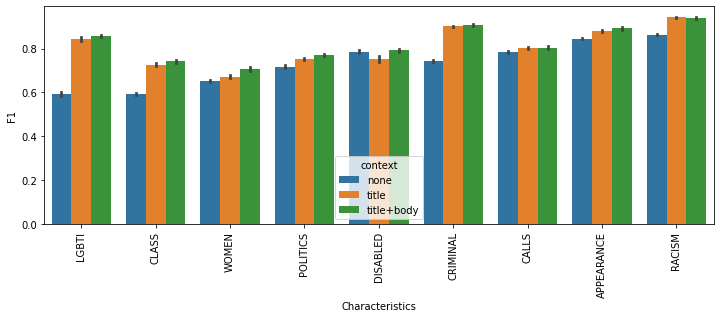

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

df_full_context_evals["context"] = "title+body"

df_context_evals["context"] = "title"
df_no_context_evals["context"] = "none"

metrics = [
    'eval_calls_f1', 'eval_women_f1', 'eval_lgbti_f1', 'eval_racism_f1',
    'eval_class_f1', 'eval_politics_f1', 'eval_disabled_f1',
    'eval_appearance_f1', 'eval_criminal_f1'
]

columns = metrics + ["context"]

df = pd.concat([df_full_context_evals[columns], df_context_evals[columns], df_no_context_evals[columns]])

data = df.melt(id_vars=["context"], value_vars=metrics)

data["variable"] = data["variable"].apply(lambda x: x.split("_")[1].upper())

data = data.sort_values("value")

plt.figure(figsize=(12, 4))
sns.barplot(data=data, x="variable", y="value", hue="context")

plt.xticks(rotation=90)
plt.ylabel("F1")
plt.xlabel("Characteristics")


plt.savefig("imgs/task_b_scores.png")